## 1. Persiapan dan Pembersihan Data

### Langkah 1: Import Library dan Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

In [8]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Langkah 2: Pembersihan Data

In [10]:
# Periksa missing values
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# mengisi missing values
day_data.fillna(method='ffill', inplace=True)
hour_data.fillna(method='ffill', inplace=True)

C:\Users\luft\AppData\Local\Temp\ipykernel_9288\1673269528.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_data.fillna(method='ffill', inplace=True)
C:\Users\luft\AppData\Local\Temp\ipykernel_9288\1673269528.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_data.fillna(method='ffill', inplace=True)


## 2. Exploratory Data Analysis (EDA)

### Langkah 1: Analisis Deskriptif

In [15]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Langkah 2: Visualisasi Data

**Pertanyaan 1: Faktor apa yang mempengaruhi jumlah peminjaman sepeda sepanjang hari?**

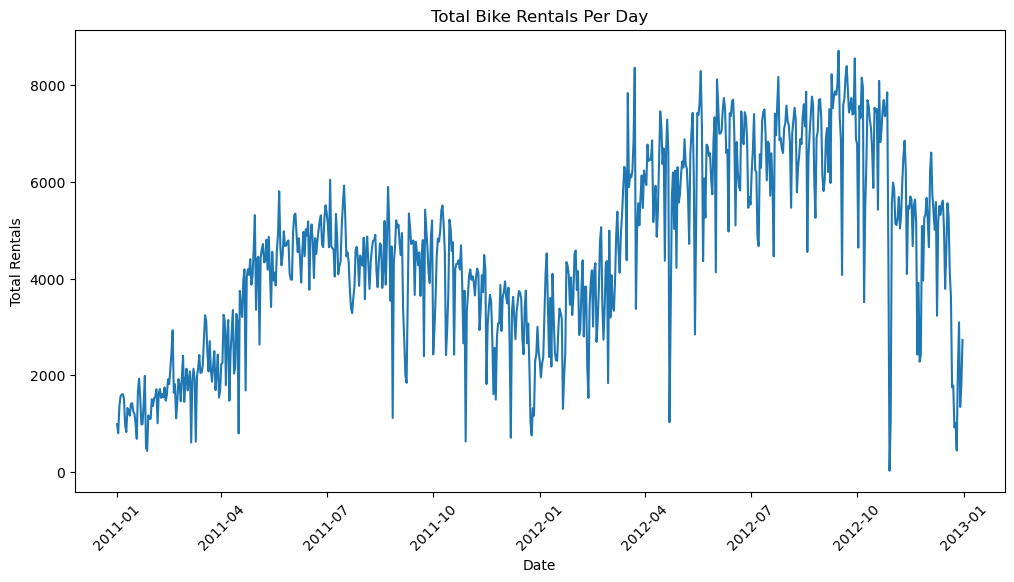

In [20]:
# Visualisasi total peminjaman sepeda sepanjang hari
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
fig1, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=day_data, ax=ax1)
ax1.set_title('Total Bike Rentals Per Day')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.show()


**Pertanyaan 2: Bagaimana distribusi peminjaman sepeda berdasarkan jam?**

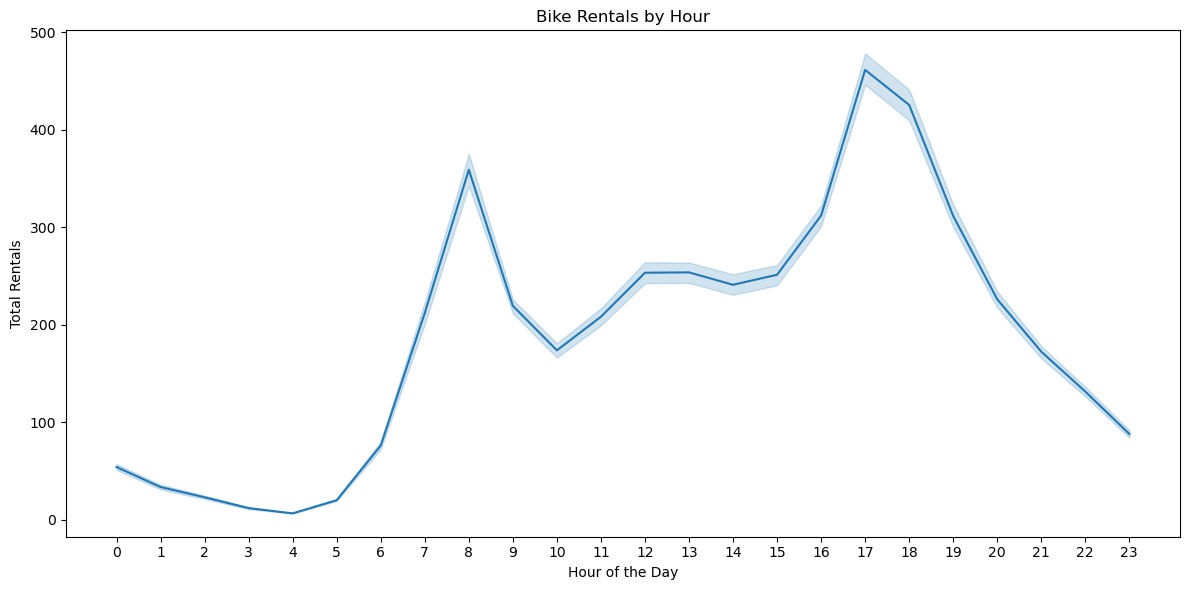

In [18]:
# Visualisasi distribusi peminjaman sepeda berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_data)
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

## Analisis Lanjutan

### Langkah 1: RFM Analysis

In [19]:
from datetime import datetime

# Convert date columns to datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Recency, Frequency, Monetary Analysis
latest_date = day_data['dteday'].max()
day_data['recency'] = (latest_date - day_data['dteday']).dt.days
day_data['frequency'] = day_data['cnt']
day_data['monetary'] = day_data['cnt'] * 1

# Summary
rfm_summary = day_data[['recency', 'frequency', 'monetary']].describe()
print(rfm_summary)

          recency    frequency     monetary
count  731.000000   731.000000   731.000000
mean   365.000000  4504.348837  4504.348837
std    211.165812  1937.211452  1937.211452
min      0.000000    22.000000    22.000000
25%    182.500000  3152.000000  3152.000000
50%    365.000000  4548.000000  4548.000000
75%    547.500000  5956.000000  5956.000000
max    730.000000  8714.000000  8714.000000
